## Predecir el coste del seguro médico de una persona
La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

## Contenido del proyecto
### EDA
* [0. Importar librerias](#c0)
* [1. Cargar el conjunto de datos](#c1)
* [2. Limpieza de datos](#c2)
    * [2.1 Identificar las variables](#s21)
    * [2.2 Identificar duplicados y valores nulos](#s22)
    * [2.3 Eliminar información irrelevante](#s23)
* [3. Análisis Univariante](#c3)
    * [3.1 Análisis categórico](#s31)
    * [3.2 Análisis numérico](#s32) 
* [4. Análisis Multivariante](#c4)
    * [4.1 Análisis Categórico-Categórico](#s41)
    * [4.2 Análisis Numérico-Numérico](#s42)
    * [4.3 Combinaciones de clase con predictoras](#s43)
    * [4.4 Análisis de correlaciones](#s44)
* [5. Ingeniería de características](#c5)
    * [5.1 Valores atípicos](#s51)
    * [5.2 Análisis de valores faltantes](#s52)
* [6. Escalado de valores](#c6)
    * [6.1 Normalización](#s61)
    * [6.2 Escalado Min-Max](#s62)
### Machine Learning 
* [7.1 Regresión lineal](#s71)
* [7.2 Optimización de hiperparámetros](#s72)

### 0. Importar librerías

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import json
from pickle import dump

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1. Cargar el conjunto de datos

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Limpieza de datos

#### 2.1 Identificar las variables

- ***age***. Edad del beneficiario principal (numérico)
- ***sex***. Género del beneficiario principal (categórico)
- ***bmi***. índice de masa corporal.(numérico)
- ***children***. Número de niños/dependientes cubiertos por un seguro médico (numérico)
- ***smoker***. ¿Es fumador? (categórico)
- ***region***. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- ***charges***. Prima del seguro médico. Será nuestra TARGET(numérico)

#### 2.2 Identificar duplicados y valores nulos

In [3]:
total_data_n = total_data.drop_duplicates()
print ("Antes:", total_data.shape)
print ("Después:", total_data_n.shape)

Antes: (1338, 7)
Después: (1337, 7)


Existía un valor duplicado.

In [4]:
total_data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


No existe ningún valor nulo.

### 2.3 Eliminar información irrelevante

En este caso, no vamos a prescindir de ningun valor del DataSet.

### 3. Análisis Univariante

#### 3.1 Análisis Categórico

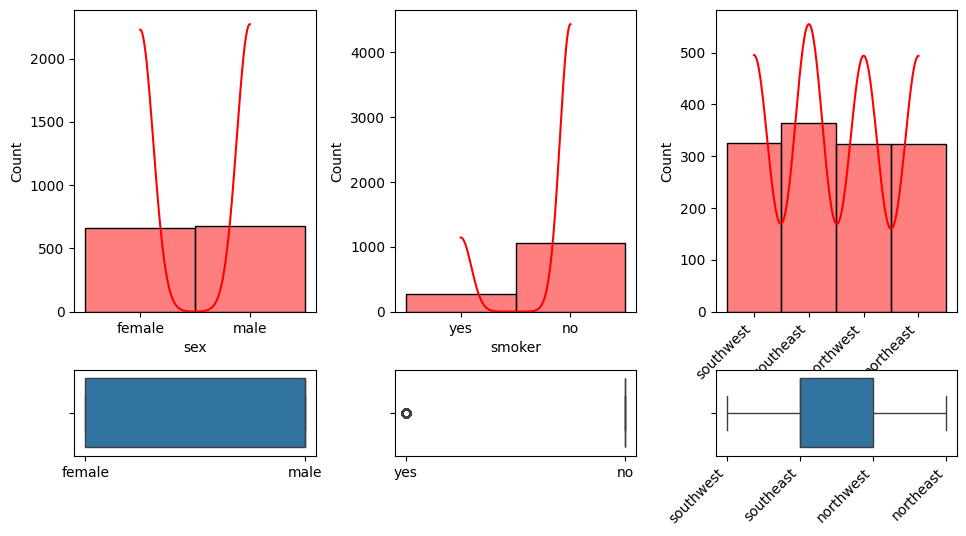

In [5]:
fig, axis = plt.subplots(2, 3, figsize=(10, 5), gridspec_kw={'height_ratios': [7, 2]})

sns.histplot(ax = axis[0,0], data = total_data_n, x = 'sex', kde = True, color = 'red')
sns.boxplot(ax = axis[1,0], data = total_data_n, x = 'sex').set(xlabel = None)

sns.histplot(ax = axis[0,1], data = total_data_n, x = 'smoker', kde = True, color = 'red')
sns.boxplot(ax = axis[1,1], data = total_data_n, x = 'smoker').set(xlabel = None)

sns.histplot(ax = axis[0,2], data = total_data_n, x = 'region', kde = True, color = 'red')
sns.boxplot(ax = axis[1,2], data = total_data_n, x = 'region').set(xlabel = None)

plt.tight_layout()
plt.setp(axis[0,2].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[1,2].get_xticklabels(), rotation=45, ha='right')
plt.show()


- ***sex***: Hay practicamente el mismo porcentaje de hombres que de mujeres.
- ***smoker***: Destaca la gente que no fuma por encima de la que sí lo hace por una gran diferencia.
- ***region***: Se divide en Noreste, Noroeste, Sureste y Suroeste, y destaca por muy poco Sureste, estando las otras tres regiones a la par.

#### 3.2 Análisis Numérico

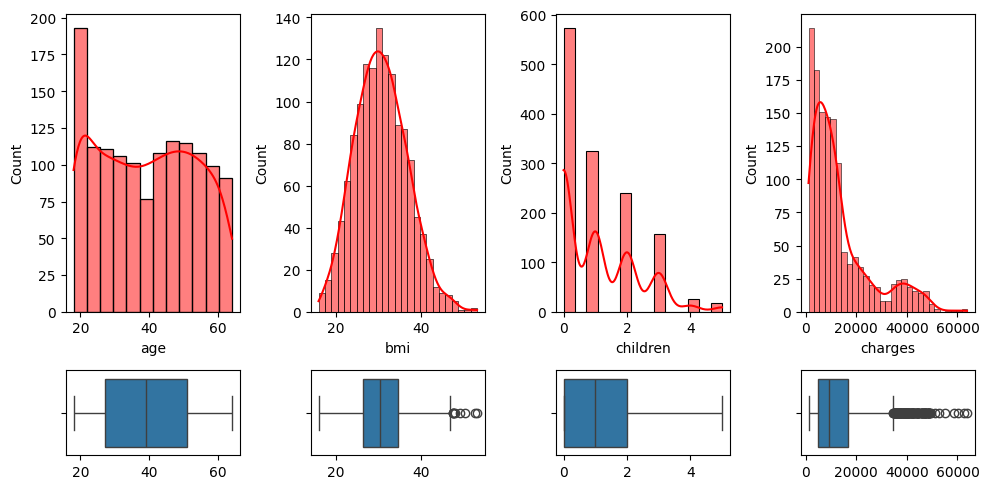

In [6]:
fig, axis = plt.subplots(2, 4, figsize=(10, 5), gridspec_kw={'height_ratios': [7, 2]})

sns.histplot(ax = axis[0,0], data = total_data_n, x = 'age', kde = True, color = 'red')
sns.boxplot(ax = axis[1,0], data = total_data_n, x = 'age').set(xlabel = None)

sns.histplot(ax = axis[0,1], data = total_data_n, x = 'bmi', kde = True, color = 'red')
sns.boxplot(ax = axis[1,1], data = total_data_n, x = 'bmi').set(xlabel = None)

sns.histplot(ax = axis[0,2], data = total_data_n, x = 'children', kde = True, color = 'red')
sns.boxplot(ax = axis[1,2], data = total_data_n, x = 'children').set(xlabel = None)

sns.histplot(ax = axis[0,3], data = total_data_n, x = 'charges', kde = True, color = 'red')
sns.boxplot(ax = axis[1,3], data = total_data_n, x = 'charges').set(xlabel = None)

plt.tight_layout()
plt.show()

- ***age***: Destaca sobretodo la edad de 20 años por encima del resto, siendo muy equivalentes las demás.
- ***bmi***: el indice de masa corporal que más destaca se mueve entre el 28% y el 32%, siendo como una pirámide con valores que se mueven entre aproximadamente un 16% y un 50%.
- ***children***: lo más común es no tener ningún niño cubierto por seguro médico, que seguramente signifique que estas personas no tienen ningún hijo. Va en orden descendente hasta los 5 hijos.
- ***charges***: la prima del seguro médico que más destaca por encima del resto es la menor que hay, siguiendo un orden descendente en su mayoría hasta la máxima registrada.

### 4. Análisis Multivariante

#### 4.1 Análisis Categórico-Categórico

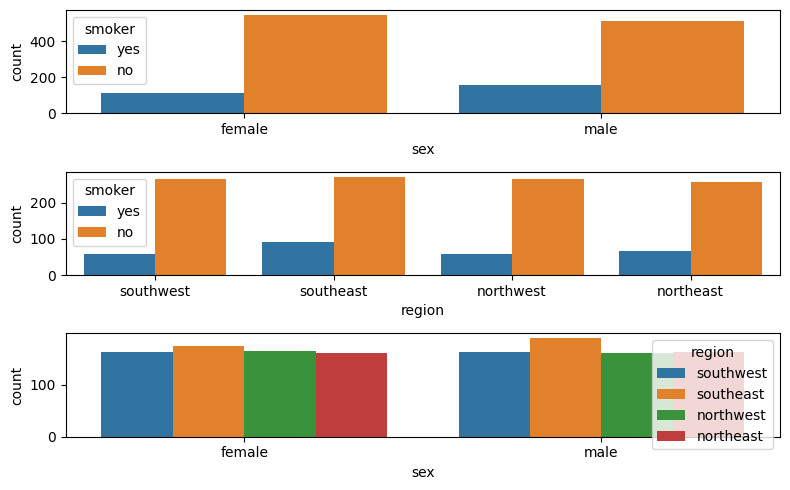

In [15]:
fig, axis = plt.subplots(3, figsize = (8, 5))

sns.countplot(ax = axis[0], data = total_data_n, x = "sex", hue = "smoker")
sns.countplot(ax = axis[1], data = total_data_n, x = "region", hue = "smoker")
sns.countplot(ax = axis[2], data = total_data_n, x = "sex", hue = "region")
plt.tight_layout()

plt.show()

No se ve ninguna relación entre estos tres grupos de datos.

#### 4.2 Anlálisis Numérico-Numérico

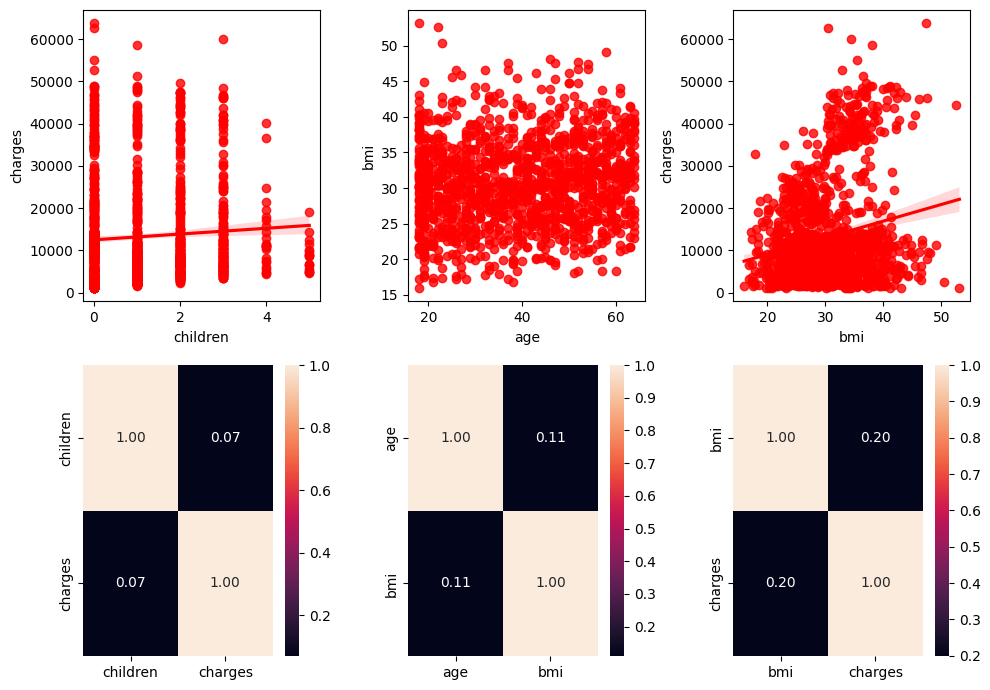

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data_n, x = "children", y = "charges", color = 'red')
sns.heatmap(total_data_n[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])
sns.regplot(ax = axis[0, 1], data = total_data_n, x = "age", y = "bmi", color = 'red')
sns.heatmap(total_data_n[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data_n, x = "bmi", y = "charges", color = 'red')
sns.heatmap(total_data_n[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()

plt.show()

- ***children/charges***: correlación de 0.07, no hay practicamente nada de correlación.
- ***age/bmi***: de nuevo correlación muy baja, de 0.11.
- ***bmi/charges***: aquí se observa un poco más que los otros dos gráficos, de 0.20.

#### 4.3 Combinaciones de clase con predictoras

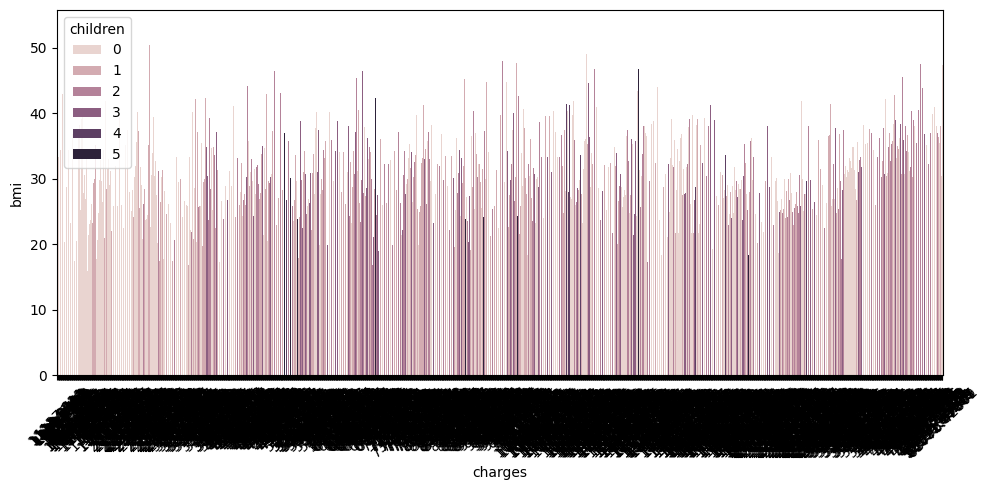

In [11]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)


sns.barplot(data = total_data_n, x = "charges", y = "bmi", hue = "children")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

No se puede sacar nada en claro de este gráfico, asi que vamos a filtrar un número más pequeño de 'charges' para que sea legible.

In [16]:
top_25_charges = total_data_n['charges'].value_counts().nlargest(25).index
total_data_charges = total_data_n[total_data_n['charges'].isin(top_25_charges)]

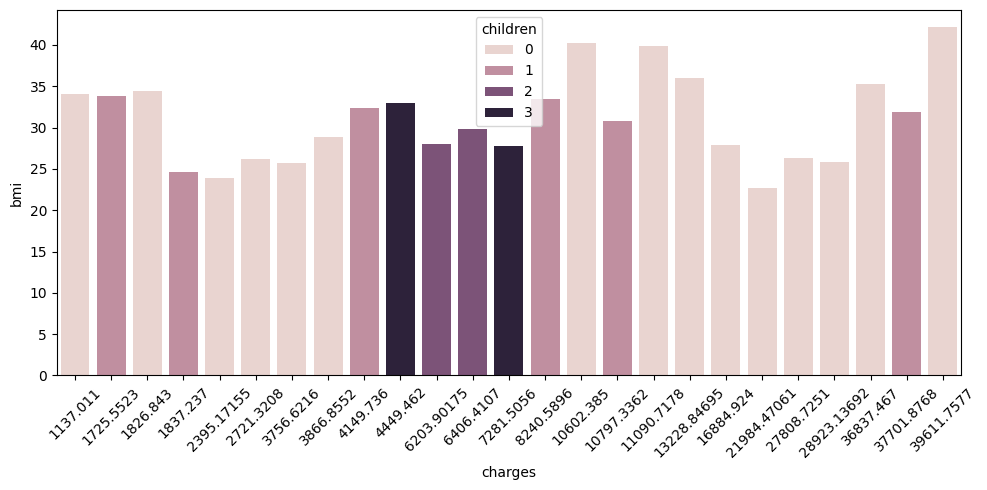

In [17]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)


sns.barplot(data = total_data_charges, x = "charges", y = "bmi", hue = "children")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aún graficándolo de esta manera, no sacamos ninguna conclusión importante de este gráfico.

#### 4.4 Análisis de correlaciones

Factorizamos las variables categóricas:

In [19]:
total_data_n["sex_n"] = pd.factorize(total_data_n["sex"])[0]
total_data_n[["sex_n", "sex"]]

,sex_n,sex
0,0,female
1,1,male
2,1,male
3,1,male
4,1,male
...,...,...
1333,1,male
1334,0,female
1335,0,female
1336,0,female


In [20]:
total_data_n["smoker_n"] = pd.factorize(total_data_n["smoker"])[0]
total_data_n[["smoker_n", "smoker"]]

,smoker_n,smoker
0,0,yes
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
1333,1,no
1334,1,no
1335,1,no
1336,1,no


In [22]:
total_data_n["region_n"] = pd.factorize(total_data_n["region"])[0]
total_data_n[["region_n", "region"]]

,region_n,region
0,0,southwest
1,1,southeast
2,1,southeast
3,2,northwest
4,2,northwest
...,...,...
1333,2,northwest
1334,3,northeast
1335,1,southeast
1336,0,southwest


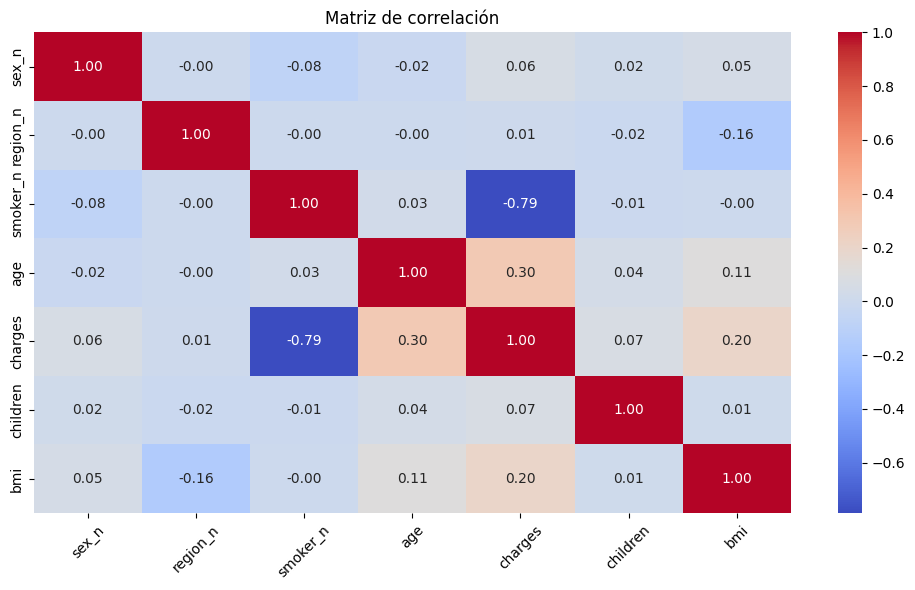

In [29]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data_n[["sex_n", "region_n", "smoker_n", "age", "charges", "children", "bmi"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Viendo el mapa de calor graficado aquí, podemos tener en cuenta los siguientes puntos:
- Entre "smoker_n" y "charges" hay un 0.79 de correlación, lo que nos indica que entre las personas fumadoras/no fumadoras y la prima del seguro médico hay, obviamente, una gran relación.
- Entre "age" y "charges" hay un 0.30, siendo también algo a tener en cuenta la edad de los clientes con la prima del seguro.
- También se observa un 0.20 entre "bmi" y "charges", siendo también un poco obvio que el indice de masa corporal del cliente tenga que ver en la prima.

A continuación graficamos el Pairplot:

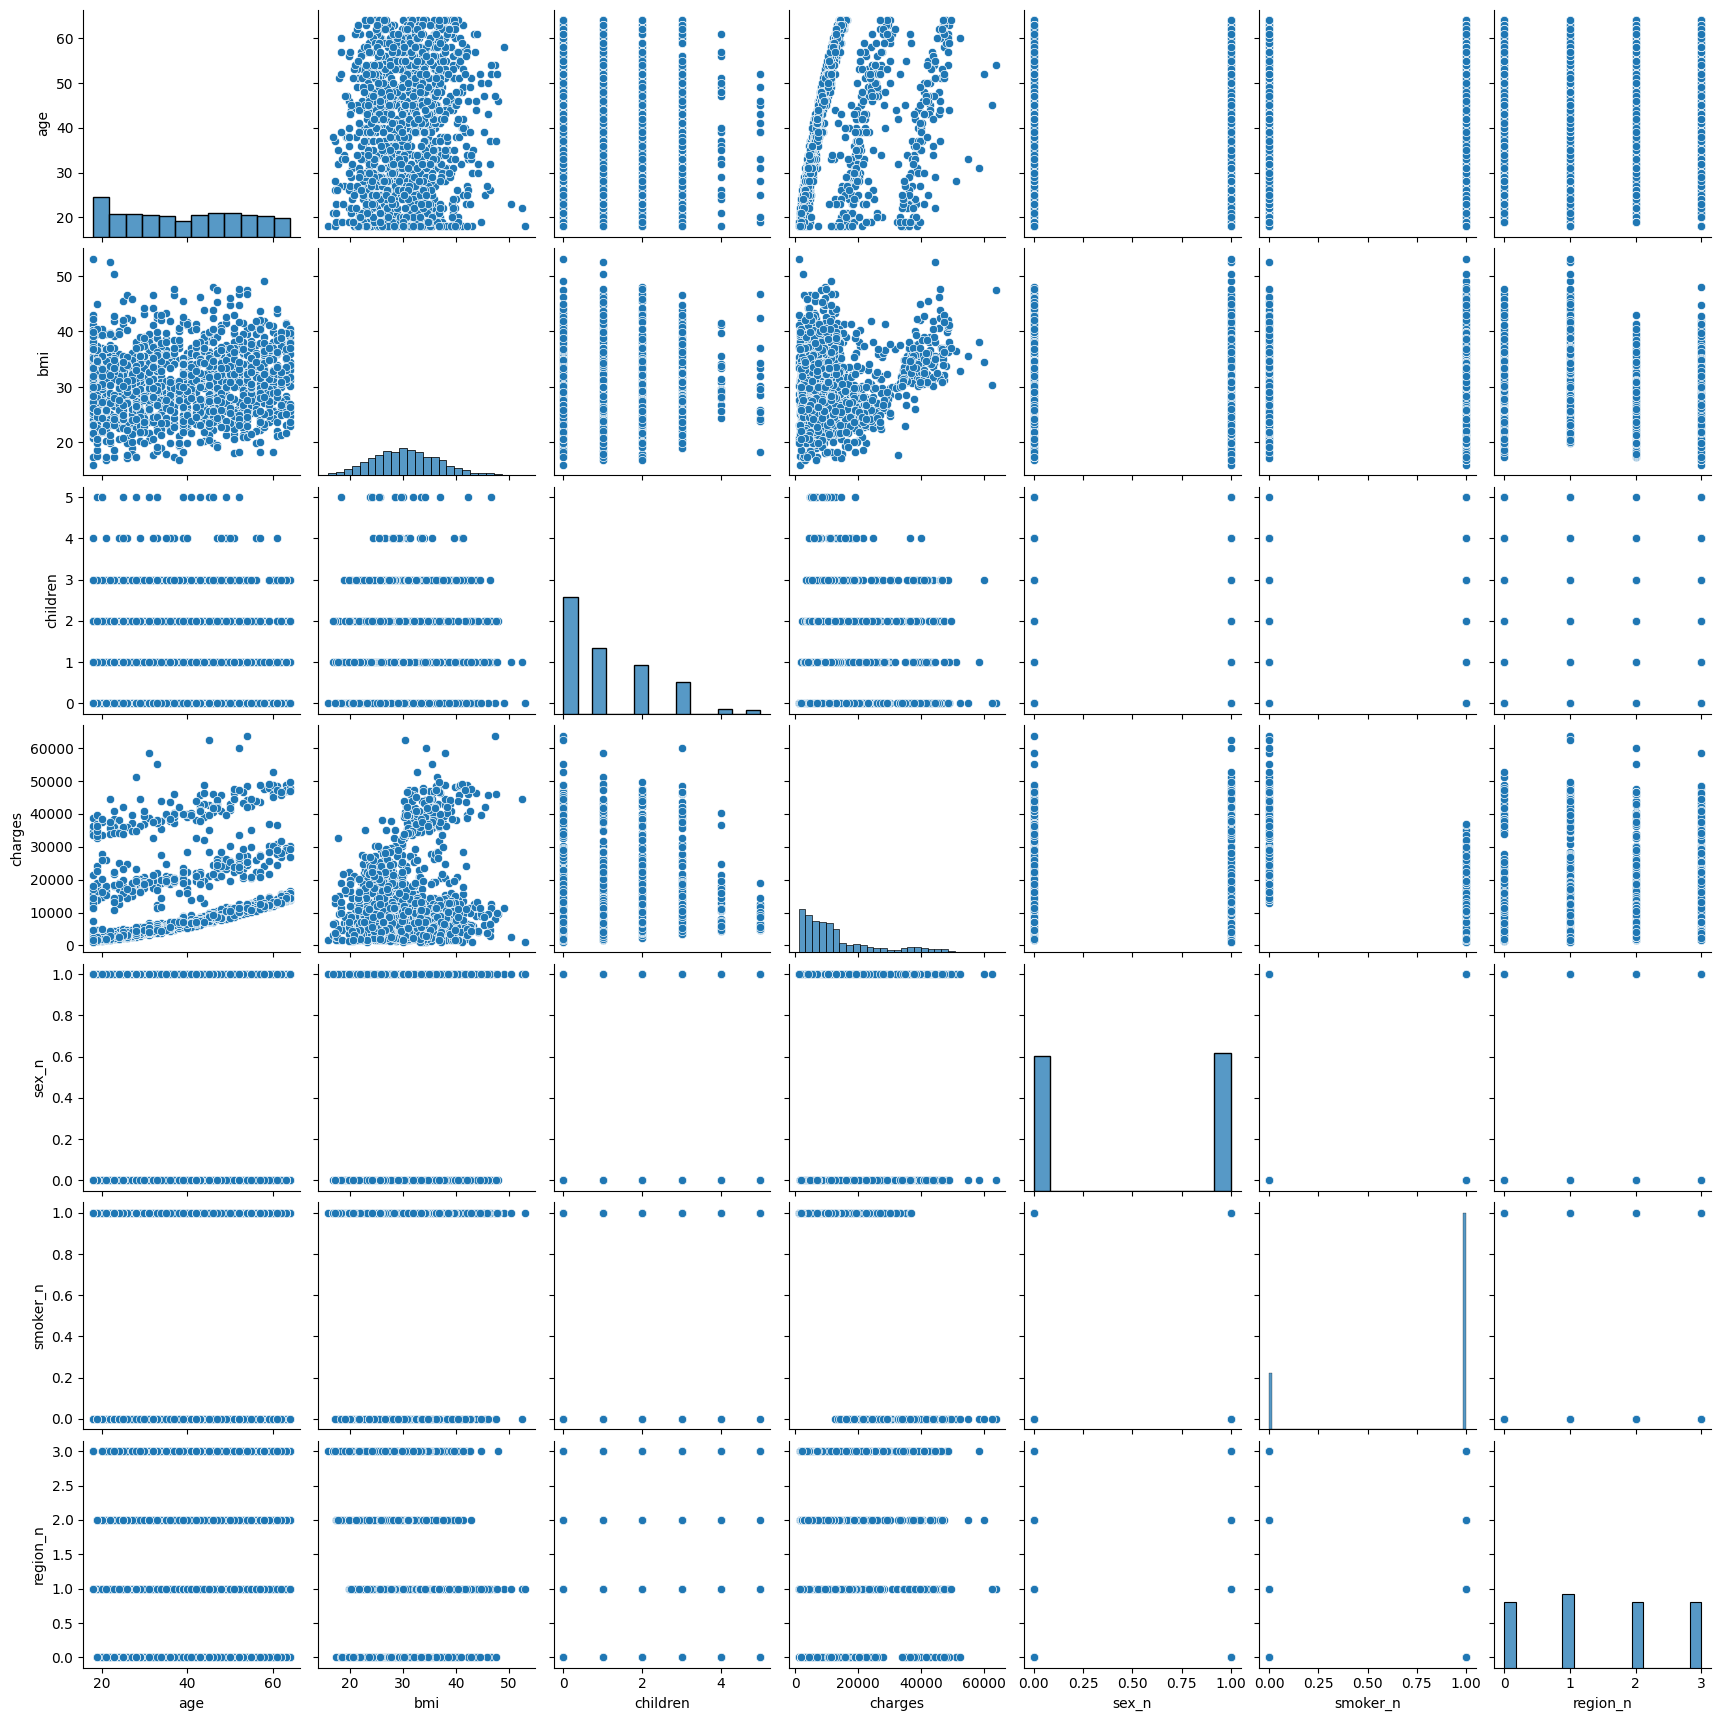

In [30]:
sns.pairplot(data = total_data_n)

### 5. Ingeniería de características

#### 5.1 Valores atípicos

In [31]:
total_data_n.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


Rescatamos los boxplot que habíamos graficado previamente con Outliers, que eran los de "bmi" y "charge":

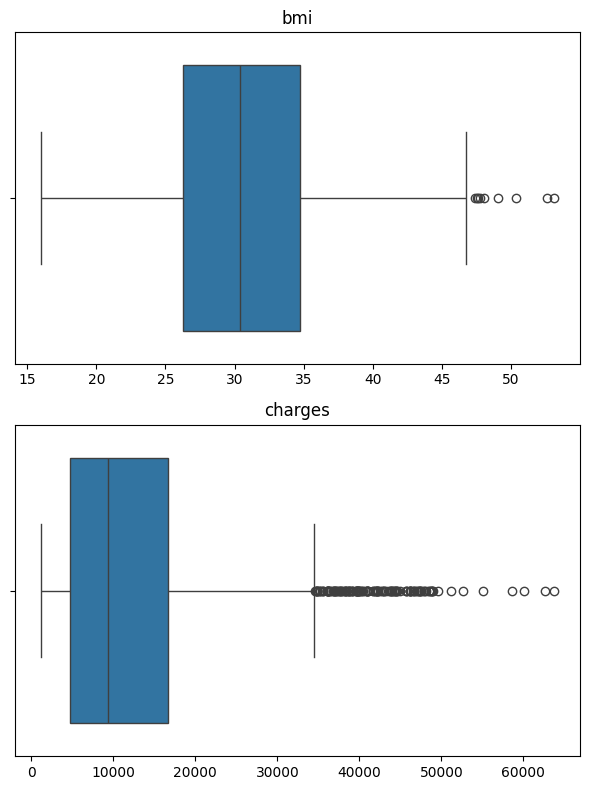

In [36]:
fig, axis = plt.subplots(2, 1, figsize = (6, 8), gridspec_kw={'height_ratios': [2, 2]})

sns.boxplot(ax = axis[0], data = total_data_n, x = 'bmi').set(xlabel = None)

sns.boxplot(ax = axis[1], data = total_data_n, x = 'charges').set(xlabel = None)

axis[0].set_title('bmi')
axis[1].set_title('charges')

plt.tight_layout()
plt.show()

In [37]:
total_data_CON_outliers = total_data_n.copy()

total_data_SIN_outliers = total_data_n.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["bmi", "charges"]:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'bmi': [np.float64(13.674999999999994), np.float64(47.31500000000001)],
 'charges': [1121.8739, np.float64(34524.777625)]}

In [38]:
total_data_CON_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [39]:
total_data_SIN_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


#### 5.2 Análisis de valores faltantes

In [41]:
total_data_CON_outliers.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [42]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Cómo se puede observar, no hay ningún valor nulo.

### 6. Escalado de valores

In [53]:
from sklearn.model_selection import train_test_split

num_variables = ["sex_n", "region_n", "smoker_n", "age", "bmi", "children"]

X_CON = total_data_CON_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_CON_outliers["charges"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("charges", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,sex_n,region_n,smoker_n,age,bmi,children
1114,1,3,1,23,24.510,0
968,1,3,1,21,25.745,2
599,0,2,1,52,37.525,2
170,1,1,1,63,41.470,0
275,0,3,1,47,26.600,2


#### 6.1 Normalización

In [54]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,sex_n,region_n,smoker_n,age,bmi,children
1114,0.971409,1.383946,0.500292,-1.157680,-0.996928,-0.907908
968,0.971409,1.383946,0.500292,-1.300619,-0.792762,0.766904
599,-1.029432,0.477983,0.500292,0.914926,1.154664,0.766904
170,0.971409,-0.427981,0.500292,1.701087,1.806837,-0.907908
275,-1.029432,1.383946,0.500292,0.557580,-0.651417,0.766904


#### 6.2 Escalado Min-Max

In [55]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

#del X_train_con_outliers_scal

,sex_n,region_n,smoker_n,age,bmi,children
1114,1.0,1.000000,1.0,0.108696,0.230024,0.0
968,1.0,1.000000,1.0,0.065217,0.263250,0.4
599,0.0,0.666667,1.0,0.739130,0.580172,0.4
170,1.0,0.333333,1.0,0.978261,0.686306,0.0
275,0.0,1.000000,1.0,0.630435,0.286252,0.4


In [56]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

### 7. Machine Learning

#### 7.1 Regresión lineal

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal
]:
    model = LinearRegression()
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7297182858804965, 0.7298127441752071, 0.7297182858804965, 0.7298127441752071, 0.7297182858804965, 0.7298127441752071]
Mejor R2: 0.7298127441752071
MSE: [37005531.72811555, 36992599.00185515, 37005531.72811554, 36992599.00185515, 37005531.72811555, 36992599.00185515]
Menor MSE: 36992599.00185515


In [58]:
model = LinearRegression()
model.fit(X_train_sin_outliers_norm, y_train)

y_pred_test = model.predict(X_test_sin_outliers_norm)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"El R2 en test del modelo de regresión lineal es de {r2_test} y el MSE en test es {mse_test}")

El R2 en test del modelo de regresión lineal es de 0.8069852180198291 y el MSE en test es 35467636.63842711


Siendo R2 = 1 la perfección, un 80.7% de variabilidad es una buena cifra.

A continuación vamos a utilizar la técnica **Lasso**:

In [59]:
from sklearn.linear_model import Lasso

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal
]:
    model = Lasso(alpha = 0.1, max_iter = 300, random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7297182849424093, 0.7298127432374065, 0.7297182854174297, 0.7298127437131183, 0.7297182795325647, 0.729812738663328]
Mejor R2: 0.7298127437131183
MSE: [37005531.856553435, 36992599.130253814, 37005531.79151619, 36992599.06512188, 37005532.59724052, 36992599.75651226]
Menor MSE: 36992599.06512188


In [60]:
model = Lasso(alpha = 0.1, max_iter = 300, random_state=42)
model.fit(X_train_sin_outliers_norm, y_train)
y_pred_test = model.predict(X_test_sin_outliers_norm)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"El R2 en test del modelo Lasso es de {r2_test} y el MSE en test es {mse_test}")

El R2 en test del modelo Lasso es de 0.8069816947423931 y el MSE en test es 35468284.062021285


Con el modelo Lasso obtenemos casi el R2 que obteniamos con la regresión lineal, solo varían hacia abajo unos decimales bastante profundos.

Así que ahora vamos a aplicar el modelo **Ridge**:

In [62]:
from sklearn.linear_model import Ridge

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal
]:
    model = Ridge(alpha = 0.1, max_iter = 300, random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7297180719673075, 0.7298125302045477, 0.729718279268974, 0.7298127375659438, 0.7297176589767268, 0.7298122697882399]
Mejor R2: 0.7298127375659438
MSE: [37005561.01596925, 36992628.29757739, 37005532.633329965, 36992599.90676025, 37005617.56043837, 36992663.95239028]
Menor MSE: 36992599.90676025


In [63]:
model = Ridge(alpha = 0.1, max_iter = 300, random_state=42)
model.fit(X_train_sin_outliers_norm, y_train)
y_pred_test = model.predict(X_test_sin_outliers_norm)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"El R2 en test del modelo Ridge es de {r2_test} y el MSE en test es {mse_test}")

El R2 en test del modelo Ridge es de 0.8069669187018436 y el MSE en test es 35470999.24907479


Aplicando el modelo Ridge obtenemos practicamente el mismo que con el Lasso, pero hay decimales mejores en el anterior modelo.

Para finalizar, vamos a utilizar el modelo **Elasticnet**:

In [64]:
from sklearn.linear_model import ElasticNet


r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal
]:
    model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=300, random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.6944022175416698, 0.6944871231174592, 0.7280089796352641, 0.7281039785045911, 0.6712612689570574, 0.6738623396189276]
Mejor R2: 0.7281039785045911
MSE: [41840819.57465821, 41829194.755757645, 37239560.828815445, 37226554.089959785, 45009154.91638219, 44653030.18475365]
Menor MSE: 37226554.089959785


In [65]:
model = ElasticNet(alpha = 0.1, max_iter = 300, random_state=42)
model.fit(X_train_sin_outliers_norm, y_train)
y_pred_test = model.predict(X_test_sin_outliers_norm)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"El R2 en test del modelo ElasticNet es de {r2_test} y el MSE en test es {mse_test}")

El R2 en test del modelo ElasticNet es de 0.7962164044441495 y el MSE en test es 37446471.43548635


Este último modelo es el que nos da la peor R2 de todas.

Como conclusión; tras haber analizado los modelos, el que ha conseguido mejor R2 es el **Modelo de regresión lineal**.